# Project - NLP - Twitter US Airline Sentiment Analysis

## Description

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

## Objective

- To understand the customers sentiment towards the airline services and what’s being said about their brand and their competitors.
- To help airines to discover the industry trend and improve their services.
- Enable airlines to respond to the customers on their specific concerns and needs.


## Data Dictionary
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

The dataset has the following columns:

- **tweet_id** - Tweet ID                                                     
- **airline_sentiment** - Sentiment classified as positive, negative, and neutral                                      
- **airline_sentiment_confidence** - Sentiment confidence level                               
- **negativereason** - Reason for negative tweet (such as "late flight" or "rude service")                                                  
- **negativereason_confidence** - Reason confidence level for negative tweet                                   
- **airline** - Airline Name                                                               
- **airline_sentiment_gold** - Airline sentiment for gold users                                         
- **name** - Name on tweeter account   
- **negativereason_gold** -  Negative reason - Gold
- **retweet_count** - Retweet count
- **text** - Tweet text
- **tweet_coord** - Location Coordinates (Lattitude, Longitude)
- **tweet_created** - Date and time of the tweet
- **tweet_location** - Location
- **user_timezone** - Timezone

-------


## Index

- <a href = #link1>Overview of the dataset and Summary</a>

- <a href = #link2>Exploratory Data Analysis</a>


- <a href = #link3>Understanding of Data Columns</a> 


- <a href = #link4>Data pre-processing</a>


- <a href = #link5>Vectorization</a> 

- <a href = #link6>Model Building and Tuning</a> 


- <a href = #link7>Model Performance Evaluation</a>

- <a href = #link8>Conclusion</a>


----

## <a id = "link1"></a> Overview of the dataset

**Importing necessary libraries**

In [1]:
import pandas as pd                                     # Import pandas
import numpy as np                                      # Import numpy
import matplotlib.pyplot as plt                         # Used for plotting
import seaborn as sns                                   # Used for plotting
from collections import Counter                         # count the key-value pairs in an object

import re, string, unicodedata                          # Import Regex, string and unicodedata for test pre-processing
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import nltk                                             # Import Natural Language Tool-Kit.
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from nltk.stem.porter import PorterStemmer              #Used for Stemming of words in the corpus


import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
from nltk.corpus import stopwords                                         # Used for removal of stop words

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')


from sklearn.feature_extraction.text import CountVectorizer      #count vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer      #tfid vectorizer


from sklearn.model_selection import train_test_split   #train test split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")


# generate random integer values
import random
from random import seed
from random import randint
# seed random number generator
seed(1)

# to suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

[nltk_data] Downloading package stopwords to /Users/abhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/abhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/abhi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load dataset and Summary

In [2]:
tweet = pd.read_csv('Tweets.csv')  #loading dataset from drive

In [3]:
data = tweet.copy()

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.000,NaN,nan,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.349,NaN,0.000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.684,NaN,nan,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.000,Bad Flight,0.703,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.000,Can't Tell,1.000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data.shape

(14640, 15)

- **Dataset has 14640 tweet entries with 15 columns**

In [6]:
cols = set(data.columns) - {'tweet_id','text'}
data[list(cols)].describe(exclude ='object').T

,count,mean,std,min,25%,50%,75%,max
airline_sentiment_confidence,14640.000,0.900,0.163,0.335,0.692,1.000,1.000,1.000
negativereason_confidence,10522.000,0.638,0.330,0.000,0.361,0.671,1.000,1.000
retweet_count,14640.000,0.083,0.746,0.000,0.000,0.000,0.000,44.000


- It appears that very few of the tweets were retweeted.
- There is good confidence of airline sentiments, with average of 90%.
- Negative reason categorization confidence is 63.8% on an average.

In [7]:
data[list(cols)].describe(include ='object').T

,count,unique,top,freq
negativereason,9178,10,Customer Service Issue,2910
negativereason_gold,32,13,Customer Service Issue,12
tweet_created,14640,14247,2015-02-24 09:54:34 -0800,5
tweet_location,9907,3081,"Boston, MA",157
airline_sentiment,14640,3,negative,9178
name,14640,7701,JetBlueNews,63
user_timezone,9820,85,Eastern Time (US & Canada),3744
airline_sentiment_gold,40,3,negative,32
tweet_coord,1019,832,"[0.0, 0.0]",164
airline,14640,6,United,3822


- There are 10 different reasons for negative tweets, where customer service issue is the top concern that customers are facing.
- More than 60% tweets are of negative sentiment.
- There are 6 airlines, more than 25% tweets are of United airlines.
- Tweets are of diveresd regions across the globe.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
data.isnull().sum(axis=0)   

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

- There are lot of null values for columns like negativereason, negativereason_confidence, airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location and user_timezone.

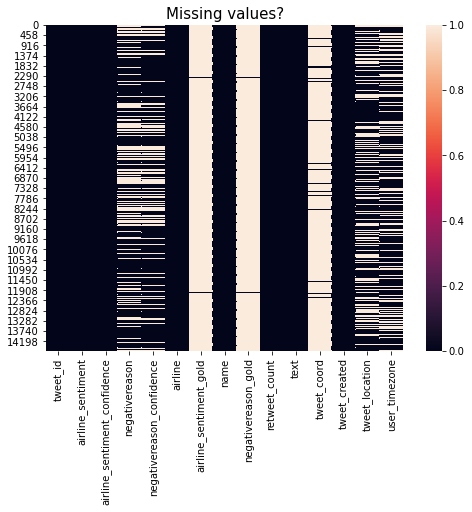

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

- There are lot of null values for columns like negativereason, negativereason_confidence, airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location and user_timezone.

In [11]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            # Nu of zero in each column
        mis_val = df.isnull().sum()                                                                #Missing value in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                        #Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         #Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               #Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  #column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     #Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 15 columns and 14640 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
negativereason_gold,0,14608,99.800,14608,99.800,object
airline_sentiment_gold,0,14600,99.700,14600,99.700,object
tweet_coord,0,13621,93.000,13621,93.000,object
negativereason,0,5462,37.300,5462,37.300,object
user_timezone,0,4820,32.900,4820,32.900,object
tweet_location,0,4733,32.300,4733,32.300,object
negativereason_confidence,1344,4118,28.100,5462,37.300,float64


- There are 7 columns that have missing values.

--------------

# <a id = "link2"></a> Exploratory Data Analysis

### Distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets

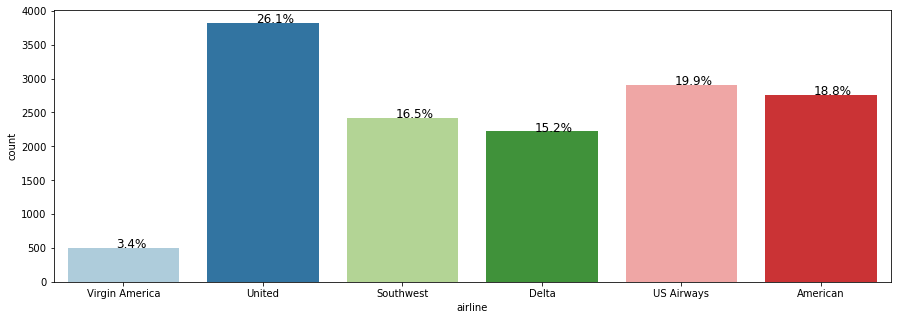

In [12]:
# Function to create the bar plots that indicate percentage for each category.

def perc_on_bar(z,deg):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    '''
    

    total = len(z) # length of the column
    plt.figure(figsize=(15,5))
    plt.xticks(rotation = deg)
    ax = sns.countplot(z,palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot
perc_on_bar(data['airline'],0)

- 26.1% of the total tweets are of United airlines.
- Virgin America has the lowest number of tweets, 3.4% of all the tweets.
- The other four airlines Southwest, Delta, US Airways and American are having tweets between 15-20% of all the tweets.

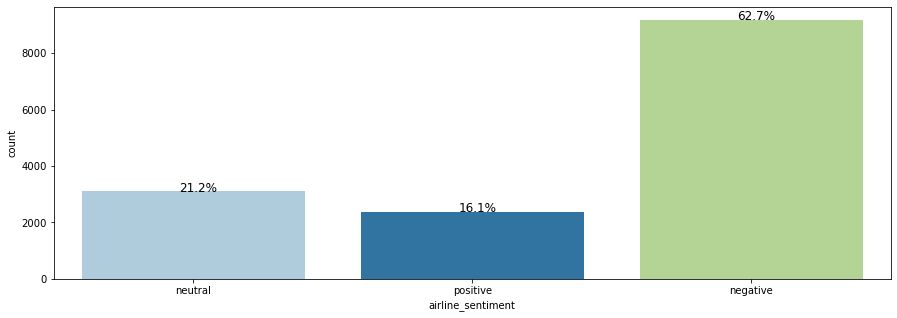

In [13]:
perc_on_bar(data['airline_sentiment'],0)

- Most of the tweets are of negative sentiments, 62.7% of all the tweets.
- Neutral and positive sentiment tweets are 21.2% and 16.1% resectively.

### Distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.

airline_sentiment  negative  neutral  positive    All
airline                                              
American               1960      463       336   2759
Delta                   955      723       544   2222
Southwest              1186      664       570   2420
US Airways             2263      381       269   2913
United                 2633      697       492   3822
Virgin America          181      171       152    504
All                    9178     3099      2363  14640
------------------------------------------------------------------------------------------------------------------------


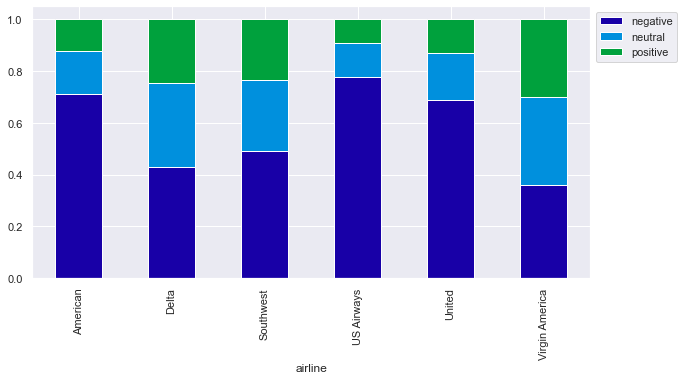

In [14]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['airline_sentiment'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['airline_sentiment'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()
stacked_plot(data['airline'])

- US Airways are having highest negative tweets contribution (77.67%).
- Virgin America has better positive tweet contribution among all.
- In all of the airlines, negative tweet contributions are greater than the neutral and positive.

### Distribution of all the negative reasons

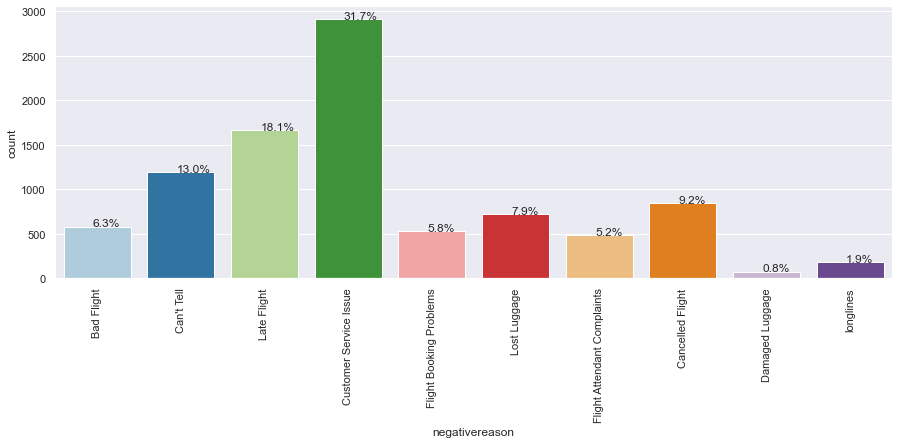

In [15]:
perc_on_bar(data[data['airline_sentiment'] == 'negative']['negativereason'], 90)   #90 deg xticks rotation for better visibility

- 31.7% negative sentiments are because of customer service issue.
- Other prominent reason for negative tweets are late, cancelled flight and lost luggage.
- 13% of negative sentiments' reason are undetermined.
- Bad flight, boking problems, flight attendance and luggage issue are also the reasons behind the negative sentiments.

## Word cloud graph of tweets for positive and negative sentiment separately

In [16]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

addlist = ['virginamerica','jetblue','americanair','southwestair','usairways','flight','united']

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list((set(stopwords) - set(customlist)).union(set(addlist)))  

In [17]:
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

#### Word cloud graph of tweets for positive sentiment

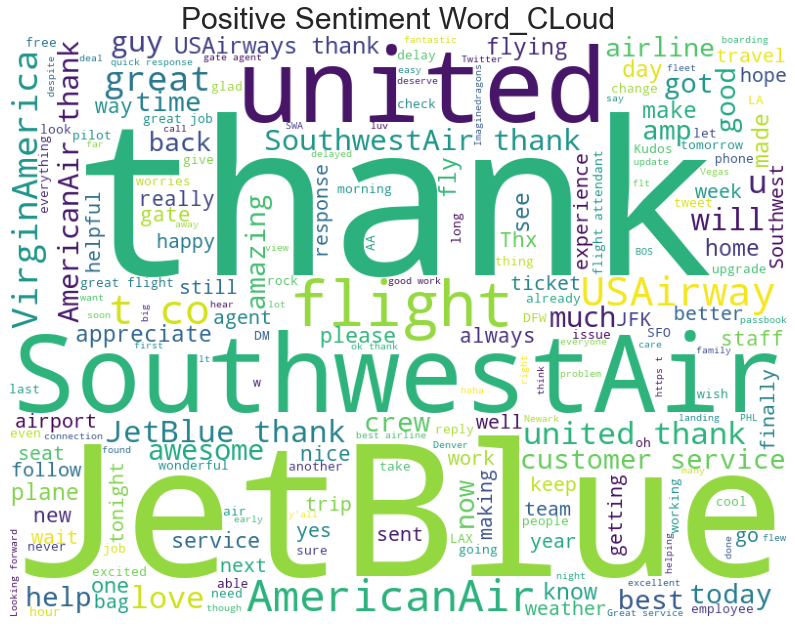

In [18]:
show_wordcloud(data[data.airline_sentiment == 'positive'],'Positive Sentiment Word_CLoud')

- Airlines' name are coming as dominent feature in word cloud, since in every tweet it's metioned, we can further make the word cloud post text-processing, removing stop words and other genralized common features.

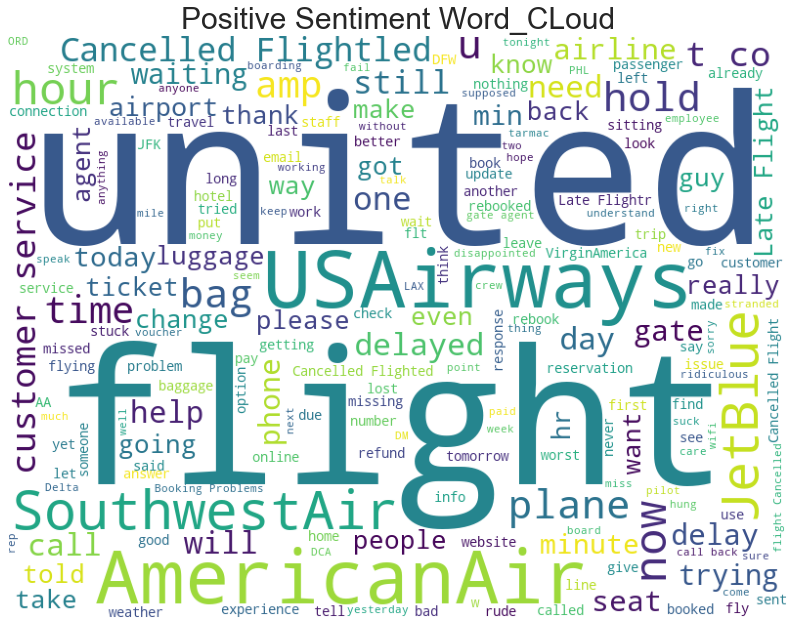

In [19]:
show_wordcloud(data[data.airline_sentiment == 'negative'],'Positive Sentiment Word_CLoud')

- Airlines' name are coming as dominent feature in word cloud, since in every tweet it's metioned, we can further make the word cloud post text-processing, removing stop words and other genralized common features.

Text(0.5, 0.98, 'Characters in message')

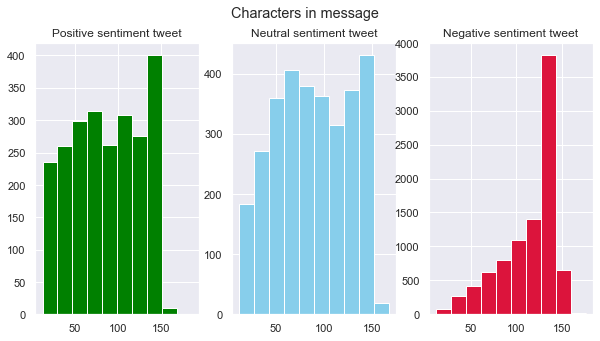

In [20]:
#Number of characters in tweets
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='green')
ax1.set_title('Positive sentiment tweet')
tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.len()
ax2.hist(tweet_len,color='skyblue')
ax2.set_title('Neutral sentiment tweet')
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.len()
ax3.hist(tweet_len,color='crimson')
ax3.set_title('Negative sentiment tweet')
fig.suptitle('Characters in message')

- We observe that the most of negative sentiment tweets are comparatively longer than neutral and positve sentiment tweets.

In [21]:
# converting 'tweet_created - time stamp' into year, month, date and hour to better analysis of temporal distribution
year=[]
month=[]
date=[]
hour=[]
for x in data['tweet_created']:
    year.append(int(x.split("-")[0]))                                          #extraction of year from date column and appending into list
    month.append(int(x.split("-")[1]))                                         #extraction of month from date column and appending into list
    date.append(int(x.split("-")[2].split(" ")[0]))                            #extraction of date of the month from date column and appending into list
    hour.append(int(x.split("-")[2].split(" ")[1].split(":")[0]))              #extraction of hour of that day from date column and appending into list

data['year']=year
data['month']=month
data['dates']=date
data['hour']=hour
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,year,month,dates,hour
0,570306133677760513,neutral,1.000,NaN,nan,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),2015,2,24,11
1,570301130888122368,positive,0.349,NaN,0.000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2015,2,24,11
2,570301083672813571,neutral,0.684,NaN,nan,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2015,2,24,11
3,570301031407624196,negative,1.000,Bad Flight,0.703,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),2015,2,24,11
4,570300817074462722,negative,1.000,Can't Tell,1.000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),2015,2,24,11


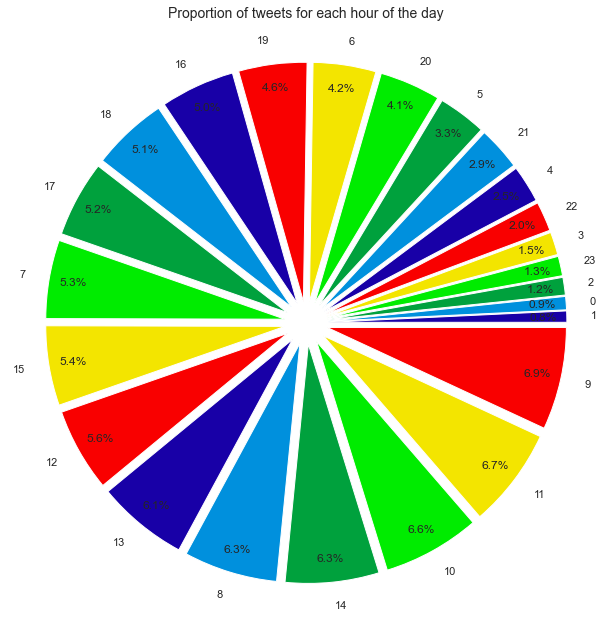

In [22]:
#Using matplotlib
Category=data['hour'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*24, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

- Tweets are equally distributed through out the different hours of the day, though at late night hours (23 hour to 3 hour), there are comparatively less tweet.

-----

# <a id = "link3"></a> Understanding of Data Columns

In [23]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'year', 'month', 'dates', 'hour'],
      dtype='object')

In [24]:
data = data[['text','airline_sentiment']] #dropping all other columns except text and airline sentiment for further analysis

In [25]:
data.shape

(14640, 2)

- Now we have two columsn namely text and airline sentiment for further processing and model building.

In [26]:
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


---------

# <a id = "link4"></a> Text pre-processing: Data pre-processing

- Html tag removal.
- Repalcing contractions
- Remove the numbers.
- Tokenization.
- Removal of Special Characters and Punctuations.
- Removal of stopwords
- Conversion to lowercase.
- Lemmatize or stemming.
- Join the words in the list to convert back to text string in the data frame

In [27]:
data = data[['text','airline_sentiment']]
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


### Html tag removal

In [28]:
def strip_html(text):      #HTML tag removal
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


### Repalcing contractions

In [29]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


### Removing the numbers

In [30]:
def remove_numbers(text):  
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


### Tokenization

In [31]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [32]:
data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


### Removal of Special Characters and Punctuations.

In [33]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [34]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

### Removal of stopwords

In [35]:
#stopwords removal

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

addlist = ['virginamerica','jetblue','americanair','southwestair','usairways','flight','united']

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list((set(stopwords) - set(customlist)).union(set(addlist)))                           

In [36]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

### Conversion to lowercase

In [37]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

### Lemmatize or stemming.

In [38]:
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

### Processing and joining words in the list to converting back to text string 

In [39]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,dhepburn say,neutral
1,plus add commercials experience tacky,positive
2,not today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative


- Now we have processed text columns for further action like vectorizer and model building.

### **Word Cloud based on Summary**

In [40]:
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

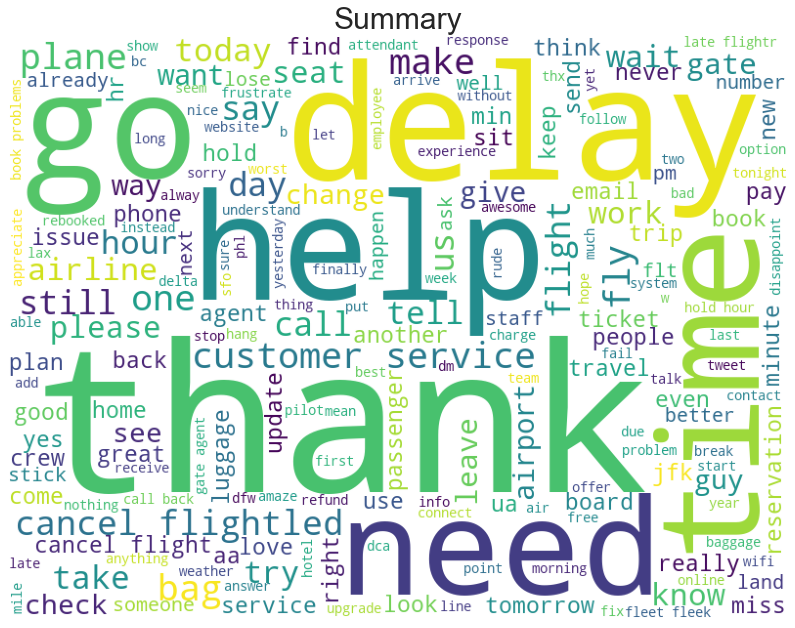

In [41]:
show_wordcloud(data,'Summary')

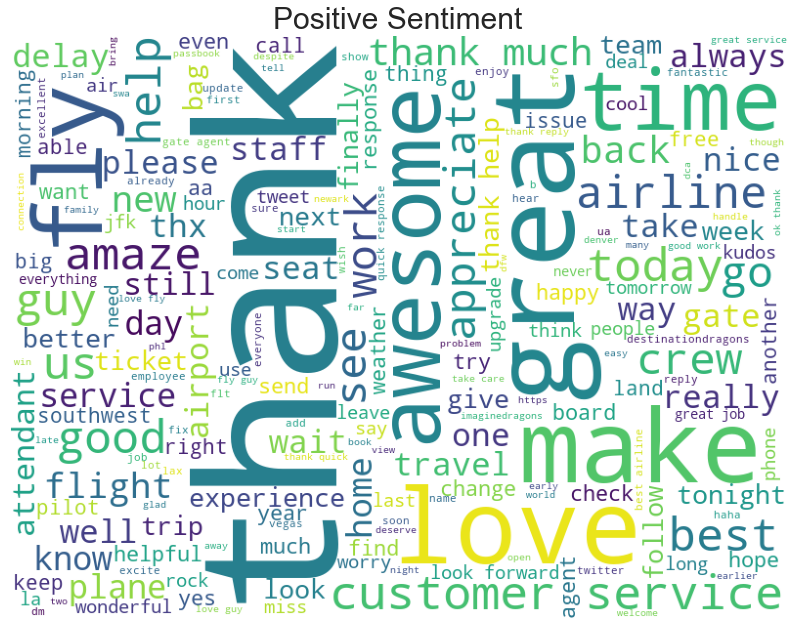

In [42]:
show_wordcloud(data[data.airline_sentiment == 'positive'],'Positive Sentiment')

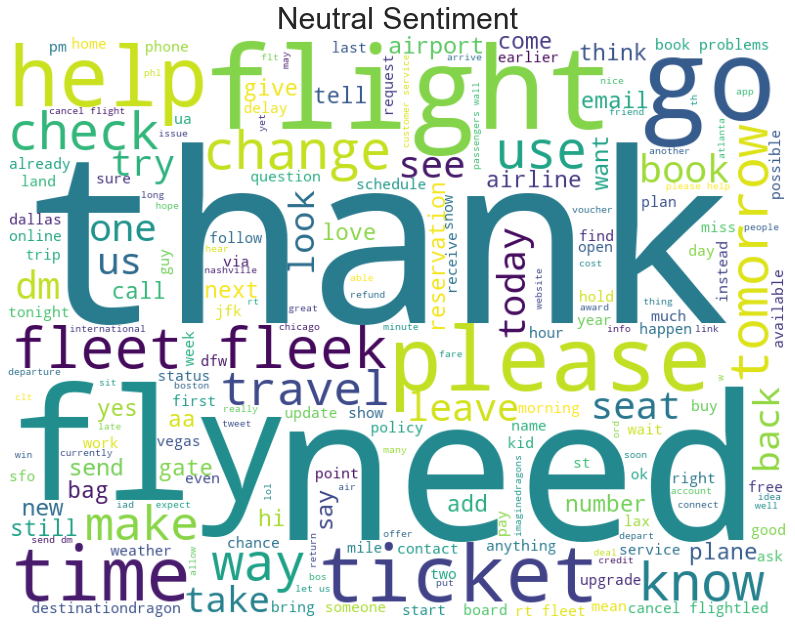

In [43]:
show_wordcloud(data[data.airline_sentiment == 'neutral'],'Neutral Sentiment')

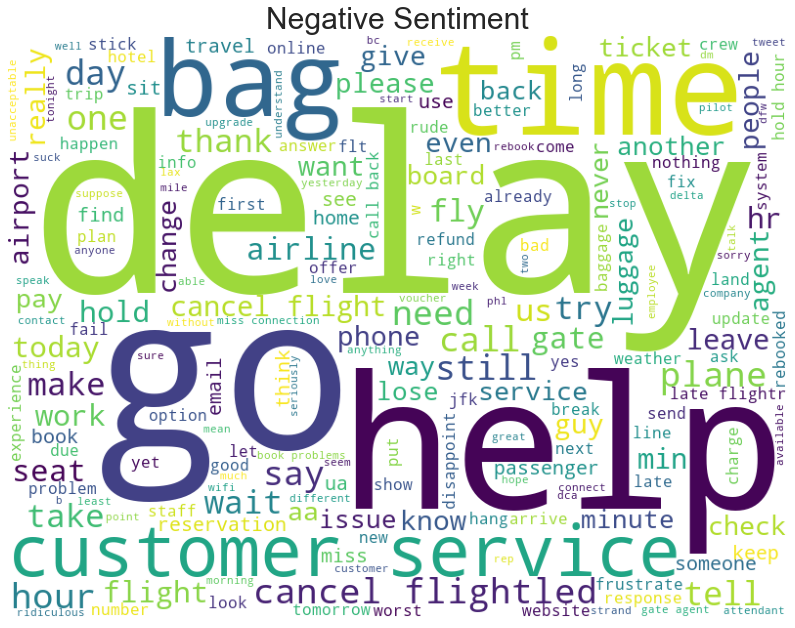

In [44]:
show_wordcloud(data[data.airline_sentiment == 'negative'],'Negative Sentiment')

- We can see the different degree of sentiment words are used by consumers to express their emotions for high scored rated product.

# <a id = "link5"></a> Vectorization

## CountVectorizer

In [45]:
# Count Vectorization (Convert text data to numbers).
bow_vec_cv = CountVectorizer(max_features=200)                # Keep only 2000 features as number of features will increase the processing time.
data_features_cv = bow_vec_cv.fit_transform(data['text'])

data_features_cv = data_features_cv.toarray()                        # Convert the data features to array.

In [46]:
data_features_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
data_features_cv.shape

(14640, 200)

- We have 200 features extracted using count vectorizer, 14640 rows of dataset (tweets).

## TfidfVectorizer

In [48]:
# Using TfidfVectorizer to convert text data to numbers.
vectorizer_tfid = TfidfVectorizer(max_features=200)
data_features_tfid = vectorizer_tfid.fit_transform(data['text'])

data_features_tfid = data_features_tfid.toarray()

data_features_tfid.shape

(14640, 200)

In [49]:
data_features_tfid

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.74627413, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

- Extracted 200 features using tf-idf of 14640 rows of dataset (tweets). Here we can see the float feature values.

# <a id = "link6"></a> Model Building and Tuning

**1(a).Model building based on CountVectorizer and Random Forest**

In [50]:
data_features_cv.shape   #data feature using count vectorizer

(14640, 200)

In [51]:
labels = data['airline_sentiment'].apply(lambda x : -1 if x == 'negative' else 1 if x =='positive' else 0)

labels = labels.astype('int')

In [52]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(data_features_cv, labels, test_size=0.3, random_state=42)

In [53]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features_cv, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.712295081967213


In [54]:
forest.score(X_train, y_train) # mean accuracy

0.9313036690085871

In [55]:
forest.score(X_test, y_test)  # mean accuracy

0.7383879781420765

- We have average CV score of 70.9%. We can look for the optimization to improve the model performance.

#### **1(b).Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [56]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b) 
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

<function matplotlib.pyplot.show(close=None, block=None)>

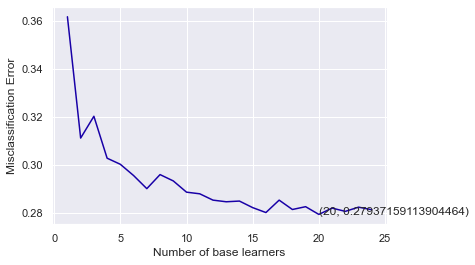

In [57]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show 

In [58]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7461293260473588

In [59]:
clf.score(X_train, y_train)

0.9402810304449649

In [60]:
np.mean(cross_val_score(clf, data_features_cv, labels, cv=10)) #cross validation score

0.7155737704918034

In [61]:
clf.score(X_test, y_test)

0.7461293260473588

In [62]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2412  302  100]
 [ 338  465   81]
 [ 182  112  400]]
0.7461293260473588


<AxesSubplot:>

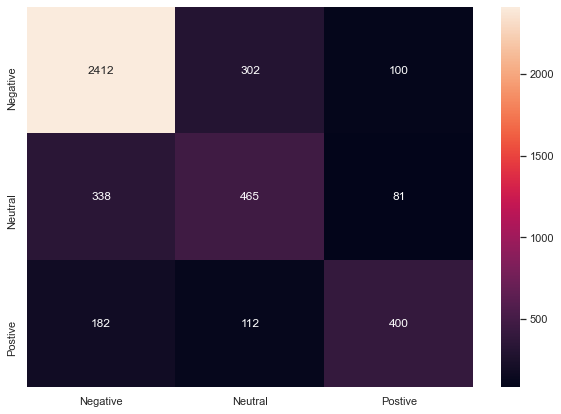

In [63]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['Negative','Neutral','Postive']],
                  columns = [i for i in ['Negative','Neutral','Postive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- Model is struggling to distinguish between Neutral and Negative sentiments tweets here, that can be seen from boe confusion matrix.

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

In [64]:
all_features = bow_vec_cv.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
print('The top 40 features using count vectorizer : \n')   
print(top_features)

The top 40 features using count vectorizer : 

thank not great get delay http hours love would fly hold help cancel go bag awesome make please us know call time one need service customer flight try wait best ticket guy like seat leave still take good hour book 


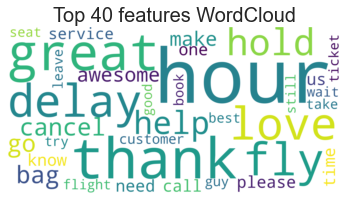

In [65]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

# **2(a). Model building using TF-IDF and Random Forest**

In [66]:
data_features_tfid.shape    #tf-idf based features

(14640, 200)

In [67]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(data_features_tfid, labels, test_size=0.3, random_state=42)

In [68]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.
forest_tf = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest_tf = forest.fit(X_train, y_train)

print(forest_tf)

print(np.mean(cross_val_score(forest_tf, data_features_tfid, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7239071038251366


In [69]:
forest_tf.score(X_train, y_train)

0.9285714285714286

In [70]:
forest_tf.score(X_test, y_test)

0.7481785063752276

#### **2(b).Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [71]:
cv_scores_tf = []
for b in base_ln:
    clf_tf = RandomForestClassifier(n_estimators = b)
    scores_tf = cross_val_score(clf_tf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores_tf.append(scores_tf.mean())

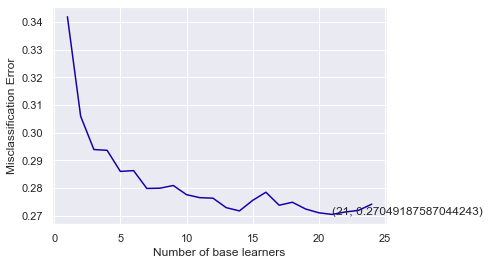

In [72]:
# plotting the error as k increases
error = [1 - x for x in cv_scores_tf]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [73]:
# Training the best model and calculating error on test data .
clf_tf = RandomForestClassifier(n_estimators = optimal_learners)
clf_tf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=21)

In [74]:
clf_tf.score(X_train, y_train)  #training accuracy

0.9390124902419984

In [75]:
np.mean(cross_val_score(forest_tf, data_features_tfid, labels, cv=10))  # CV Accuracy 

0.723155737704918

In [76]:
clf_tf.score(X_test, y_test)  #test accuracy

0.7504553734061931

In [77]:
result = clf_tf.predict(X_test)

[[2486  250   78]
 [ 384  434   66]
 [ 206  112  376]]
0.7504553734061931


<AxesSubplot:>

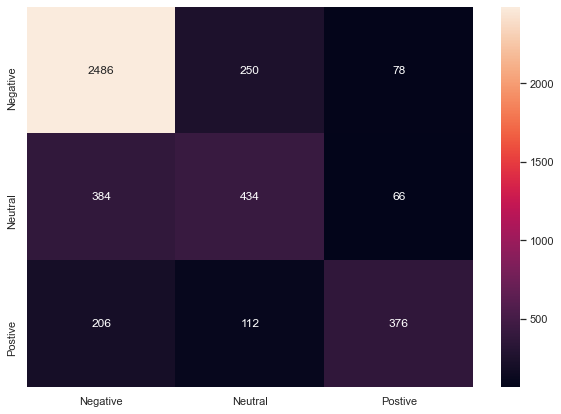

In [78]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['Negative','Neutral','Postive']],
                  columns = [i for i in ['Negative','Neutral','Postive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- Here we can see the improved result with better classification power to distingusih between Negative and Neutral tweets.

In [79]:
all_features = vectorizer_tfid.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf_tf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
print('The top 40 features using TF-IDF : \n') 
print(Top_features)

The top 40 features using TF-IDF : 

thank not http great delay get love cancel fly would please wait hours make hold call know need bag good flight dm awesome service go best time us help tomorrow follow hour leave airline like take plane customer ticket work 


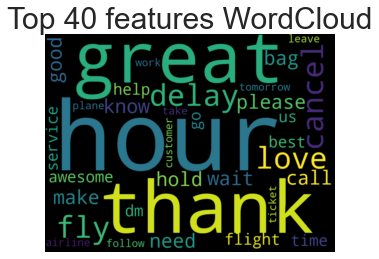

In [80]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

-----

# <a id = "link7"></a> Model Evaluation

In [82]:
model_eval = pd.DataFrame({'Model':['CountVectorizer Random Forest','Count Vectorizer Oprtimized Random Forest',
                                          'TF-IDF Random Forest','TF-IDF Optimized Random Forest'], 'CV Score (Accuracy, CV=10)':[0.712,0.715,0.723,0.723], 'Test_Accuracy':[0.738,0.746,0.748,0.750]}) 
model_eval

,Model,"CV Score (Accuracy, CV=10)",Test_Accuracy
0,CountVectorizer Random Forest,0.712,0.738
1,Count Vectorizer Oprtimized Random Forest,0.715,0.746
2,TF-IDF Random Forest,0.723,0.748
3,TF-IDF Optimized Random Forest,0.723,0.750


- TF-IDF with optimized Random Forest using cross validation gives here the comparatvely better result among all.

# <a id = "link8"></a> Conclusion

**We have built the sentiment analysis model capable of classifying the sentiments of the customers from the tweets with optimized accuracy. There are few conclusions that can be made through the pre-processing, vectorization and model exploration process :** 

- We used a twitter dataset which has **views in text format and their sentiment classified as positive, negative and neutral.**
- The goal was to **build a model for sentiment analysis**.
- We **pre-processed the data** using various techniques and libraries, to further explore the model to classify the sentiments better.
- We **created a Word Cloud plot** based on summary and high and low score.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model. We have used count vectorizer and tf-idf vectorizer both to understand the effectiveness and we observed that tf-idf works better because it helps to analyze the comparative importance and eliminate the repeated features.
- We trained the model and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- We saw that using the above techniques, our model performed well in perspective of how sentiment analysis models perform.
- However, **we can still increase the accuracy of our model by increasing the dataset we took into account for the model building** (We've currently only 14,640 entries in the dataset available)
- We can also increase the **max_feature parameter** in the vectorizer to look at performance and improvement. 
- We can apply **other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further.

**Thus, the built Sentiment Analysis model can be well utilized by the airlines to understand customers sentiments, view points and to improve the response mechanism with overall service delivery**